In [174]:
import sys
import shutil
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import *
from plot_skylocs import LimitPlot
from astropy.cosmology import Planck15

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [175]:
# nmc = 200
# nobj = 1000
# for imc in tqdm_notebook(range(nmc)):
#     for iobj in tqdm_notebook(range(nobj)):
#         shutil.move("/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_skylocs"+str(imc)+"/LL2_TSmx_lim_b_o"+str(iobj)+"_data.npz",\
#                     "/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_skylocs/LL2_TSmx_lim_b_o"+str(iobj)+"_data_skyloc"+str(imc)+".npz")


In [21]:
# catalog = pd.read_csv("/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSTully_ALL_DATAPAPER_Planck15_v4.csv")

# nmc = 200
# nobj = 1000
# for imc in tqdm_notebook(range(nmc)):
#     for iobj in tqdm_notebook(range(nobj)):
#         rep_angext = np.array([0.02785567,0.12069876,0.21354185,0.30638494,0.39922802,0.49207111,0.5849142,0.67775728,0.77060037,0.86344346,0.95628654,1.04912963,1.14197272,1.2348158,1.32765889,1.42050198,1.51334507,1.60618815,1.69903124,1.79187433])
#         obj_angext = 2*catalog[u'rs'].values[iobj] / \
#                      (Planck15.angular_diameter_distance(catalog[u'z'].values[iobj]).value*1000) \
#                      * 180./np.pi
#         rep_index = (np.abs(rep_angext-obj_angext)).argmin()

#         np.loadtxt("../data/Tully_randlocs"+str(int(np.loadtxt("../data/Tully_skylocs"+str(imc)+"/skyloc_obj"+str(iobj)+".txt")))+"/lb_obj"+str(rep_index)+".dat")

In [457]:
work_dir = '/tigress/bsafdi/github/NPTF-working/NPTF-ID-Catalog/runs_sid/notebooks/LimitPlot//'
plots_dir = '/tigress/bsafdi/github/NPTF-working/NPTF-ID-Catalog/runs_sid/notebooks/'
data_dir = work_dir + 'data/'


In [458]:
data_file_names =[ data_dir + f for f in ['stath_max-lim.dat','stath_min-lim.dat','statp_q16-lim.dat','statp_q84-lim.dat',
                  'Jcm_q16-lim.dat','Jcm_q84-lim.dat','GCE.dat','FermiDwarf.dat','nominal-data.dat','gce-abazajian.dat',
                                         'gce-calore.dat','gce-gordon.dat','thermal-relic.dat'  ] ]

data_files = [np.loadtxt(f) for f in data_file_names]


In [459]:
####Poisson error bands
massP = 10**data_files[2][::,0]
Lim16 = 10**data_files[2][::,1]
Lim84 = 10**data_files[3][::,1]
LimP_disp = (np.log10(Lim84) - np.log10(Lim16))/2.0

####Halo Stat error bands
massH = 10**data_files[4][::,0]
LimH16 = 10**data_files[4][::,1]
LimH84 = 10**data_files[5][::,1]
LimH_disp = (np.log10(LimH84) - np.log10(LimH16))/2.0


#####Combine the uncertainties
Lim_uncert = np.sqrt(LimP_disp**2 + LimH_disp**2)

###GCE
GCE = data_files[6]
GCE_ab = data_files[9]
GCE_calore = data_files[10]
GCE_gordan = data_files[11]

###Fermi Dwarf
massD = 10**data_files[8][::,0]
LimD = 10**data_files[8][::,1]

#####thermal
thermal = 10**data_files[12]

###Cross Corr
mDM_ary = [10,20,50,100,200,300,400,500,700,1000,10000]
lim_ary = np.array(np.array([[  3.47613312e-25,   3.19993932e-25,   4.09432255e-25,
          5.74111275e-25,   8.19273323e-25,   1.11412925e-24,
          1.54077804e-24,   1.88342427e-24,   2.45742289e-24,
          3.51413849e-24,   1.88285952e-23],
       [  6.84653178e-25,   6.11339438e-25,   8.88586835e-25,
          1.46856813e-24,   2.37706561e-24,   3.06228027e-24,
          3.78778553e-24,   4.28537842e-24,   5.06539081e-24,
          6.20444331e-24,   3.37611100e-23]]))


In [460]:
ab_mean = GCE_ab[0]
ab_up = GCE_ab[-1,1]
ab_low = GCE_ab[1,1]
ab_L = GCE_ab[3,0]
ab_R = GCE_ab[2,0]


In [495]:
plot_data_skylocs = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_skylocs',
                        elephant=False, 
                        nmc=200,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        halos_ran=800, 
                        halos_to_keep=800,
                        data_type="skylocs")

In [507]:
# data_skylocs_ary, _ = plot_data_skylocs.return_limits()

In [424]:
np.save("data_skylocs_ary",data_skylocs_ary)

In [500]:
data_skylocs_ary = np.load("data_skylocs_ary.npy")

In [527]:
plot_data = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully//',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=True,
                        xsecslim=5,
#                       TS100=9,
#                     TS1000=9,
#                       TSabove=9,
                      halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSTully_ALL_DATAPAPER_Planck15_v4.csv")

In [528]:
data_ary, _ = plot_data.return_limits()

In [529]:
plot_data_nb = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully/////',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=True,
                        xsecslim=5,
#                       TS100=9,
#                       TS1000=9,
#                       TSabove=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSTully_ALL_DATAPAPER_Planck15_v4.csv",
                        file_prefix='LL2_TSmx_lim_b_nb_o')

In [530]:
data_ary_nb, _ = plot_data_nb.return_limits()

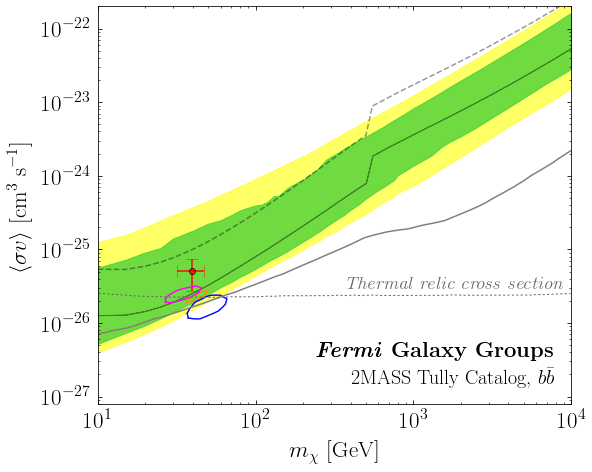

In [525]:
fig,ax = plt.subplots(1,figsize=(10/1.2,8/1.2))

# plt.plot(m_arr,data_lim,color='k',label=r'Galaxy groups (this work)',linewidth=2,linestyle='solid')
# plt.plot(m_arr,data_lim_nb,color='black',label=r'Galaxy groups (no boost)',linewidth=1,linestyle='dashed')

# fudge=1.0 
# plt.fill_between(m_arr,fudge*rot_q2p5,fudge*rot_q97p5,color='yellow',label=r'95\% containment',alpha=0.6)
# plt.fill_between(m_arr,fudge*rot_q16,fudge*rot_q84,color='limegreen',label=r'68\% containment',alpha=0.7)

plt.fill_between(plot_data.marr,10**np.percentile(data_skylocs_ary[-1], 2.5, axis=1),10**np.percentile(data_skylocs_ary[-1], 97.5, axis=1),color='yellow',label=r'95\% containment',alpha=0.6)
plt.fill_between(plot_data.marr,10**np.percentile(data_skylocs_ary[-1], 16, axis=1),10**np.percentile(data_skylocs_ary[-1], 84, axis=1),color='limegreen',label=r'68\% containment',alpha=0.7)

plt.fill_between(plot_data.marr,10**np.percentile(data_ary[-1], 2.5, axis=1),10**np.percentile(data_ary[-1], 97.5, axis=1), alpha=0.4, color='k',label=r'Galaxy groups (this work)')
plt.plot(plot_data.marr,10**np.percentile(data_ary_nb[-1], 2.5, axis=1), alpha=0.4, color='k',ls='--',label=r'Galaxy groups (no boost)')


plt.plot(10**GCE[::,0],10**GCE[::,1],color='darkorange',alpha= 1.0,lw=1.4)
plt.plot(10**GCE[[0,-1],0],10**GCE[[0,-1],1],color='darkorange',alpha= 1.0,lw=1.4)
plt.plot(10**GCE_calore[::,0],10**GCE_calore[::,1],color='blue',alpha = 1.0,lw=1.4) #label = r'Daylan et. al. 2014 (2$\sigma$)',alpha=0.5)
plt.plot(10**GCE_calore[[0,-1],0],10**GCE_calore[[0,-1],1],color='blue',alpha = 1.0,lw=1.4)
plt.plot(10**GCE_gordan[::,0],10**GCE_gordan[::,1],color='magenta',alpha = 1.0,lw=1.4)
plt.plot(10**GCE_gordan[[0,-1],0],10**GCE_gordan[[0,-1],1],color='magenta',alpha = 1.0,lw=1.4)
plt.errorbar([10**ab_mean[0]],[10**ab_mean[1]],yerr = [ np.array([10**ab_mean[1] - 10**ab_low]), np.array([10**ab_up - 10**ab_mean[1] ]) ],
            xerr = [ np.array([10**ab_mean[0] - 10**ab_L]), np.array([10**ab_R - 10**ab_mean[0] ]) ],color='red',
            linewidth=2.0, capsize=6,capthick=.6,markersize=6,marker='o',alpha=0.7,mec='k')

plt.plot(massD,LimD,color='grey',label = r'$\mathit{Fermi}$ dwarfs (2016)')

plt.plot(thermal[::,0],thermal[::,1],linestyle='dotted',color='dimgrey',linewidth=1)
plt.text(380, 3.e-26, r'\emph{Thermal relic cross section}',fontsize=19.,color='dimgrey')
# plt.text(7000, 1.0e-27, r'$b \bar b$',fontsize=20,color='black')

handles,labels = ax.get_legend_handles_labels()

# handles = [handles[0],handles[4], handles[3],handles[1],handles[2]] #, handles[2]]
# labels = [labels[0], handles[1],labels[4],labels[3],labels[2]] #, labels[2]]

# labels = [u'Galaxy groups (this work)',
#  u'95\\% containment',
#  u'68\\% containment',
#           u'Galaxy groups, no boost',
#  u'$\\mathit{Fermi}$ dwarfs (2016)']

# leg = plt.legend(handles,labels,loc=2,fontsize=17,fancybox=True,facecolor='none')
# leg = plt.legend(loc=2,fontsize=18,fancybox=True,facecolor='none')


# set the alpha value of the legend: it will be translucent
# leg.get_frame().set_alpha(0.1)

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=23);
plt.yticks(fontsize=23);
plt.xlabel(r"$m_\chi$ [GeV]",fontsize=23)
plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^3$ s$^{-1}$]",fontsize=23)
#plt.legend(fontsize=18,loc = 2)

plt.xlim([1e1,1e4])
plt.ylim([8e-28,2e-22])

plt.text(240.3, 3.5e-27, r'\textbf{\emph{Fermi} Galaxy Groups}',fontsize=22,color='black')
plt.text(400.3, 1.5e-27, r'2MASS Tully Catalog, $b\bar b$',fontsize=20,color='black')



plt.tight_layout()

# plt.savefig(plots_dir + 'stacked_limit-TS5-ps-mask-v4.pdf',bbox_inches='tight')


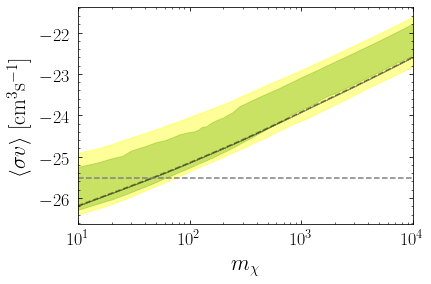

In [464]:
plt.fill_between(plot_data.marr,np.percentile(data_skylocs_ary[-1], 16, axis=1),np.percentile(data_skylocs_ary[-1], 84, axis=1), alpha=0.4, color='forestgreen')
plt.fill_between(plot_data.marr,np.percentile(data_skylocs_ary[-1], 2.5, axis=1),np.percentile(data_skylocs_ary[-1], 97.5, axis=1), alpha=0.4, color='yellow')

plt.fill_between(plot_data.marr,np.percentile(data_ary[-1], 2.5, axis=1),np.percentile(data_ary[-1], 97.5, axis=1), alpha=0.4, color='k')
plt.plot(plot_data.marr,np.percentile(data_ary_nb[-1], 2.5, axis=1), alpha=0.4, color='k',ls='--')



plt.axhline(np.log10(3e-26), ls = '--', color='grey')
plt.xscale("log")
plt.xlim(10,10000)
plt.ylabel("$\langle \sigma v \\rangle$ [cm$^3$s$^{-1}$]")
plt.xlabel("$m_\chi$")
plt.legend()
plt.show()

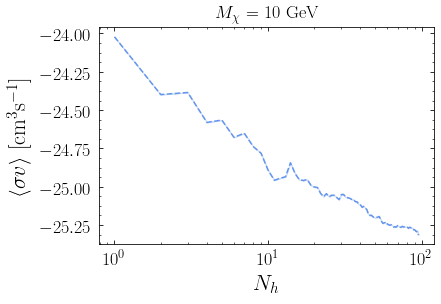

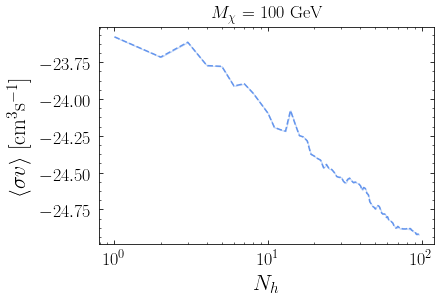

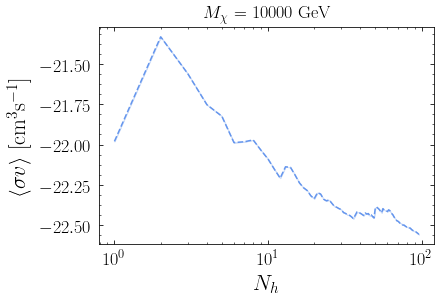

In [414]:
for midx in [0,11,52]:
    plt.plot(np.arange(len(data_ary[0][:,midx,:])) + 1,np.percentile(data_ary[0][:,midx,:],[50],axis=1)[0], color='cornflowerblue', ls='--')

    plt.fill_between(np.arange(len(data_ary[0][:,midx,:])) + 1,np.percentile(data_ary[0][:,midx,:],[16],axis=1)[0],np.percentile(data_ary[0][:,midx,:],[84],axis=1)[0], alpha=0.1, color='cornflowerblue')
    plt.fill_between(np.arange(len(data_ary[0][:,midx,:])) + 1,np.percentile(data_ary[0][:,midx,:],[2.5],axis=1)[0],np.percentile(data_ary[0][:,midx,:],[97.5],axis=1)[0], alpha=0.2, color='cornflowerblue')

    plt.title("$M_\chi$ = " + str(int(plot_data_skylocs.marr[midx])) + " GeV")
    
    plt.xlabel("$N_h$")
    plt.ylabel("$\langle \sigma v \\rangle$ [cm$^3$s$^{-1}$]")
    
    plt.xscale("log")
    plt.show()

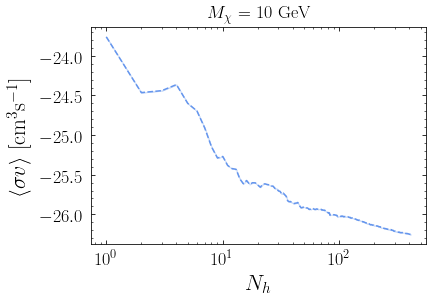

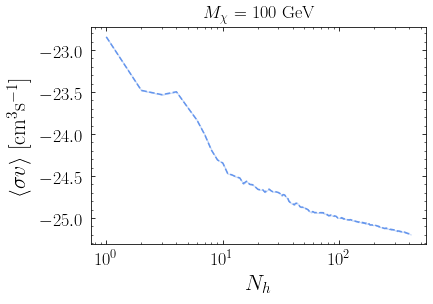

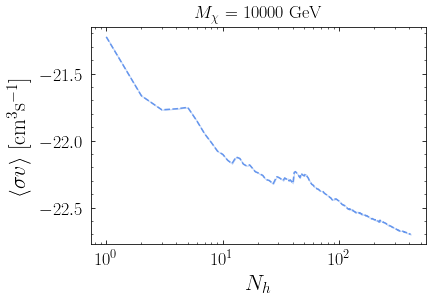

In [415]:
for midx in [0,11,52]:
    plt.plot(np.arange(len(data_ary_p8[0][:,midx,:])) + 1,np.percentile(data_ary_p8[0][:,midx,:],[50],axis=1)[0], color='cornflowerblue', ls='--')

    plt.fill_between(np.arange(len(data_ary_p8[0][:,midx,:])) + 1,np.percentile(data_ary_p8[0][:,midx,:],[16],axis=1)[0],np.percentile(data_ary_p8[0][:,midx,:],[84],axis=1)[0], alpha=0.1, color='cornflowerblue')
    plt.fill_between(np.arange(len(data_ary_p8[0][:,midx,:])) + 1,np.percentile(data_ary_p8[0][:,midx,:],[2.5],axis=1)[0],np.percentile(data_ary_p8[0][:,midx,:],[97.5],axis=1)[0], alpha=0.2, color='cornflowerblue')

    plt.title("$M_\chi$ = " + str(int(plot_data_skylocs_p8.marr[midx])) + " GeV")
    
    plt.xlabel("$N_h$")
    plt.ylabel("$\langle \sigma v \\rangle$ [cm$^3$s$^{-1}$]")
    
    plt.xscale("log")
    plt.show()

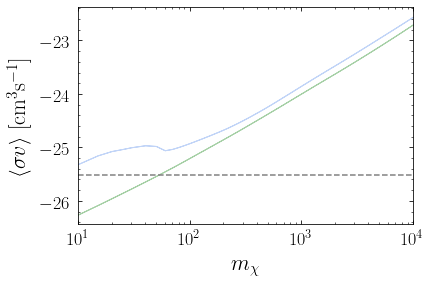

In [416]:
# Loc 0
# mc_ary0, _ = plot_mc_sl0.return_limits()
plt.fill_between(plot_data_skylocs.marr,np.percentile(data_ary[0][-1], 16, axis=1),np.percentile(data_ary[0][-1], 84, axis=1), alpha=0.4, color='cornflowerblue')
plt.fill_between(plot_data_skylocs.marr,np.percentile(data_ary_p8[0][-1], 16, axis=1),np.percentile(data_ary_p8[0][-1], 84, axis=1), alpha=0.4, color='forestgreen')


plt.axhline(np.log10(3e-26), ls = '--', color='grey')
plt.xscale("log")
plt.xlim(10,10000)
plt.ylabel("$\langle \sigma v \\rangle$ [cm$^3$s$^{-1}$]")
plt.xlabel("$m_\chi$")
plt.legend()
plt.show()

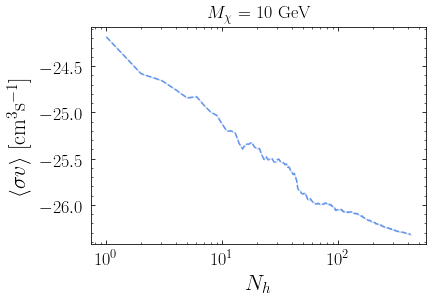

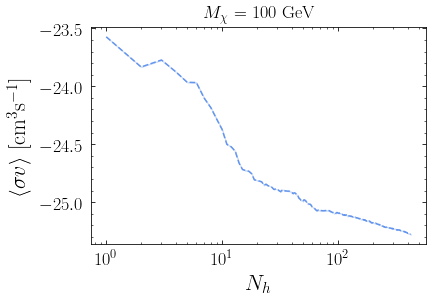

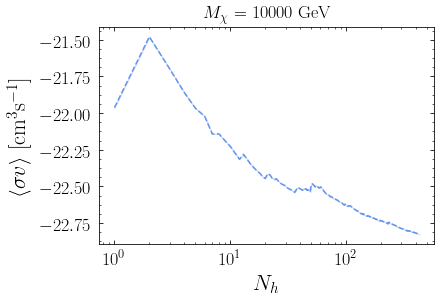

In [21]:
for midx in [0,11,52]:
    plt.plot(np.arange(len(data_ary[0][:,midx,:])) + 1,np.percentile(data_ary[0][:,midx,:],[50],axis=1)[0], color='cornflowerblue', ls='--')

    plt.fill_between(np.arange(len(data_ary[0][:,midx,:])) + 1,np.percentile(data_ary[0][:,midx,:],[16],axis=1)[0],np.percentile(data_ary[0][:,midx,:],[84],axis=1)[0], alpha=0.1, color='cornflowerblue')
    plt.fill_between(np.arange(len(data_ary[0][:,midx,:])) + 1,np.percentile(data_ary[0][:,midx,:],[2.5],axis=1)[0],np.percentile(data_ary[0][:,midx,:],[97.5],axis=1)[0], alpha=0.2, color='cornflowerblue')

    plt.title("$M_\chi$ = " + str(int(plot_data_skylocs.marr[midx])) + " GeV")
    
    plt.xlabel("$N_h$")
    plt.ylabel("$\langle \sigma v \\rangle$ [cm$^3$s$^{-1}$]")
    
    plt.xscale("log")
    plt.show()

/tigress/smsharma/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


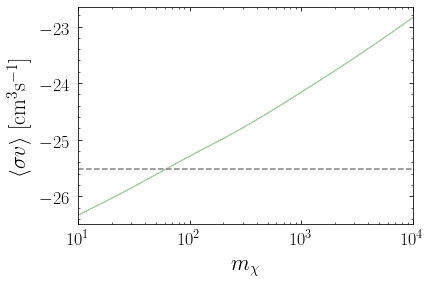

In [22]:
# Loc 0
# mc_ary0, _ = plot_mc_sl0.return_limits()
plt.fill_between(plot_data_skylocs.marr,np.percentile(data_ary[0][-1], 16, axis=1),np.percentile(data_ary[0][-1], 84, axis=1), alpha=0.4, color='forestgreen')
plt.axhline(np.log10(3e-26), ls = '--', color='grey')
plt.xscale("log")
plt.xlim(10,10000)
plt.ylabel("$\langle \sigma v \\rangle$ [cm$^3$s$^{-1}$]")
plt.xlabel("$m_\chi$")
plt.legend()
plt.show()

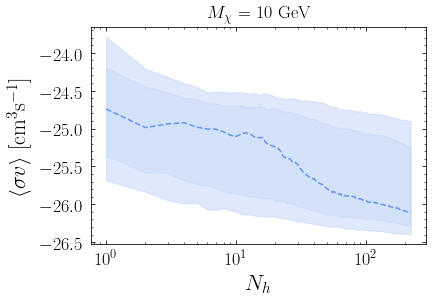

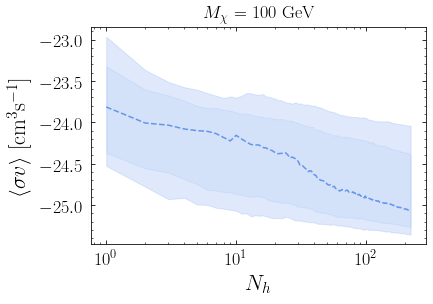

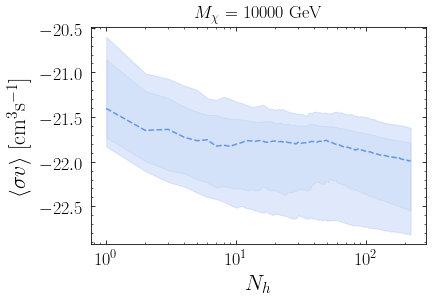

In [420]:
for midx in [0,11,52]:
    plt.plot(np.arange(len(data_skylocs_ary[:,midx,:])) + 1,np.percentile(data_skylocs_ary[:,midx,:],[50],axis=1)[0], color='cornflowerblue', ls='--')

    plt.fill_between(np.arange(len(data_skylocs_ary[:,midx,:])) + 1,np.percentile(data_skylocs_ary[:,midx,:],[16],axis=1)[0],np.percentile(data_skylocs_ary[:,midx,:],[84],axis=1)[0], alpha=0.1, color='cornflowerblue')
    plt.fill_between(np.arange(len(data_skylocs_ary[:,midx,:])) + 1,np.percentile(data_skylocs_ary[:,midx,:],[2.5],axis=1)[0],np.percentile(data_skylocs_ary[:,midx,:],[97.5],axis=1)[0], alpha=0.2, color='cornflowerblue')

    plt.title("$M_\chi$ = " + str(int(plot_data_skylocs.marr[midx])) + " GeV")
    
    plt.xlabel("$N_h$")
    plt.ylabel("$\langle \sigma v \\rangle$ [cm$^3$s$^{-1}$]")
    
    plt.xscale("log")
    plt.show()

In [444]:
xsecs = np.logspace(-33,-18,301)
LLs = np.load("../data/Tully//LL2_TSmx_lim_b_o0_data.npz")['LL2']
LLs_p7 = np.load("../data/Tully_p7////LL2_TSmx_lim_b_o0_data.npz")['LL2']

(-5, 30)

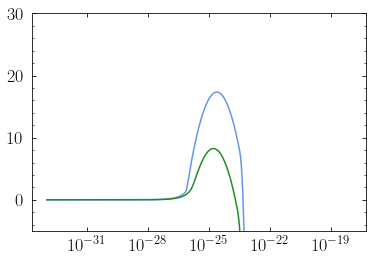

In [445]:
plt.plot(xsecs, LLs[0]-LLs[0][0])
plt.plot(xsecs, LLs_p7[0]-LLs_p7[0][0])


plt.xscale("log")
plt.ylim(-5,30)

(-5, 30)

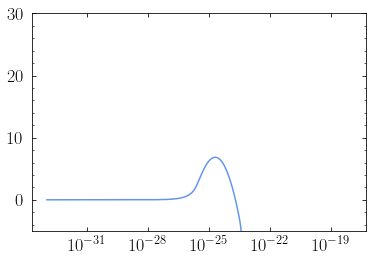

In [191]:
plt.plot(xsecs, LLs[1]-LLs[1][0])
plt.xscale("log")
plt.ylim(-5,30)

In [188]:
pd.read_csv("/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSTully_ALL_DATAPAPER_Planck15_v4.csv")

,Unnamed: 0,Name,mulog10Jnb_inf,siglog10Jnb_inf,mulog10J_inf,siglog10J_inf,log10Mvir_inf,z,Nest,Ng,...,rvir_inf,rs,ID_2MASXJ,Bib_z,GName,3FGL 0.5,3FGL 1,3FGL 2,N3FGL 5,ang_ext
0,4387,MESSIER_049,18.164248,0.337346,18.913682,0.354394,14.723456,0.004958,100002,192,...,2.130007e+03,3.410498e+02,12294679+0800014,2000MNRAS.313..469S,Virgo,[],[],['3FGL J1226.8+0638' '3FGL J1223.3+0818'],8,1.791865e+00
1,5221,NGC_5128,17.864995,0.350136,18.526417,0.363590,13.658011,0.002614,100350,6,...,9.408498e+02,1.136660e+02,13252775-4301073,1978PASP...90..237G,NaN,['3FGL J1325.4-4301'],['3FGL J1324.0-4330e' '3FGL J1325.4-4301'],['3FGL J1333.8-4417' '3FGL J1324.0-4330e' '3FG...,14,1.129411e+00
2,15807,NGC_1316,17.682939,0.345964,18.394158,0.349048,14.025306,0.004531,200015,49,...,1.246570e+03,1.657499e+02,03224178-3712295,1998A&AS..130..267L,Fornax,['3FGL J0322.5-3721'],['3FGL J0322.5-3721'],['3FGL J0322.5-3721'],4,9.525756e-01
3,2103,MESSIER_081,17.882948,0.367027,18.357049,0.370216,11.260071,0.000263,101368,3,...,1.494500e+02,1.082288e+01,09553318+6903549,1991RC3.9.C...0000d,NaN,[],['3FGL J0955.4+6940'],['3FGL J0955.4+6940'],6,1.063957e+00
4,4415,MESSIER_094,17.670560,0.357400,18.276359,0.376261,12.882525,0.001590,120491,3,...,5.189799e+02,5.200627e+01,12505314+4107125,1993A&A...272...63M,NaN,[],[],[],6,8.488050e-01
5,3622,MESSIER_109,17.599168,0.349559,18.265725,0.364692,13.706718,0.003717,100008,56,...,9.763834e+02,1.195206e+02,11573598+5322282,2001A&A...370..765V,UrsaMajor,[],[],[],4,8.363012e-01
6,17658,ESO_137-_G_006,17.419112,0.331870,18.209407,0.335224,15.103804,0.016896,200002,167,...,2.842570e+03,5.071065e+02,16150386-6054261,2008MNRAS.383..445W,Norma,[],[],['3FGL J1630.3-6126' '3FGL J1603.7-6011'],8,7.933490e-01
7,4833,MESSIER_104,17.462935,0.346526,18.168173,0.374774,13.971740,0.005562,100128,15,...,1.196011e+03,1.569356e+02,12395949-1137230,2000MNRAS.313..469S,NaN,['3FGL J1239.1-1158'],['3FGL J1239.1-1158'],['3FGL J1239.1-1158'],5,7.356519e-01
8,15605,NGC_1275,17.375641,0.332121,18.165509,0.335306,15.082785,0.017429,200001,180,...,2.796667e+03,4.962753e+02,03194823+4130420,1992ApJS...83...29S,Perseus,['3FGL J0319.8+4130'],['3FGL J0316.6+4119' '3FGL J0319.8+4130'],['3FGL J0316.6+4119' '3FGL J0319.8+4130'],7,7.531715e-01
9,4768,NGC_4696,17.404204,0.336041,18.161692,0.356260,14.794488,0.012818,100003,113,...,2.244399e+03,3.680181e+02,12484927-4118399,1991RC3.9.C...0000d,Centaurus,[],[],[],7,7.551791e-01


In [196]:
np.load("../data/Tully//LL2_TSmx_lim_b_o1_data.npz")['lim']

array([  3.87195226e-25,   4.81553778e-25,   5.89249727e-25,
         7.04359778e-25,   8.18089705e-25,   1.04481377e-24,
         1.25959667e-24,   1.45722388e-24,   1.64291060e-24,
         1.80945594e-24,   1.95799163e-24,   2.08707354e-24,
         2.20946646e-24,   2.31633426e-24,   2.41969838e-24,
         2.52229877e-24,   2.61576590e-24,   2.70923877e-24,
         2.88874413e-24,   3.05812954e-24,   3.23008606e-24,
         3.40441621e-24,   3.58972031e-24,   3.77311572e-24,
         3.97032122e-24,   4.25186747e-24,   4.54814797e-24,
         4.94433296e-24,   5.44170905e-24,   5.96099417e-24,
         6.50273700e-24,   7.07079271e-24,   7.64211270e-24,
         8.24006686e-24,   8.86556761e-24,   9.48395561e-24,
         1.07812347e-23,   1.21264586e-23,   1.35257118e-23,
         1.49776315e-23,   1.64856311e-23,   1.96588246e-23,
         2.30007595e-23,   2.83522766e-23,   3.79325260e-23,
         4.84533596e-23,   7.19757286e-23,   9.81037813e-23,
         1.26734782e-22,

In [290]:
zip(np.load("../data/Tully//LL2_TSmx_lim_b_o0_data.npz")['LL2'][0],np.load("../data/Tully_p7//LL2_TSmx_lim_b_o0_data.npz")['LL2'][0])

[(-200414.06433587772, -200606.47373181477),
 (-200414.06433587772, -200606.47373181477),
 (-200414.06433587772, -200606.47373181477),
 (-200414.06433587772, -200606.47373181477),
 (-200414.06433587772, -200606.47373181477),
 (-200414.06433587772, -200606.47373181477),
 (-200414.06433587772, -200606.47373181477),
 (-200414.06433587772, -200606.47373181477),
 (-200414.06433587772, -200606.47373181477),
 (-200414.0643358776, -200606.47373181471),
 (-200414.06433586069, -200606.47373180513),
 (-200414.06433583118, -200606.47373178875),
 (-200414.06433578525, -200606.47373176055),
 (-200414.06433573371, -200606.47373172888),
 (-200414.06433566782, -200606.47373168747),
 (-200414.06433559378, -200606.47373164093),
 (-200414.06433550236, -200606.47373158141),
 (-200414.06433539029, -200606.47373150624),
 (-200414.06433526456, -200606.47373142189),
 (-200414.06433512346, -200606.47373132719),
 (-200414.0643349704, -200606.47373122696),
 (-200414.06433479892, -200606.47373111465),
 (-200414.06

In [471]:
pd.read_csv('../..//DataFiles//PP-Factor/AtProduction_gammas.dat', delim_whitespace=True).columns.values

array(['mDM', 'Log[10,x]', 'eL', 'eR', 'e', '\\[Mu]L', '\\[Mu]R', '\\[Mu]',
       '\\[Tau]L', '\\[Tau]R', '\\[Tau]', 'q', 'c', 'b', 't', 'WL', 'WT',
       'W', 'ZL', 'ZT', 'Z', 'g', '\\[Gamma]', 'h', '\\[Nu]e',
       '\\[Nu]\\[Mu]', '\\[Nu]\\[Tau]', 'V->e', 'V->\\[Mu]', 'V->\\[Tau]'], dtype=object)